# Downscaling Geo-Spatio-Temporal SIF Data with MODIS  using Convolutional Neural Networks 


# Data Used and Curation

Datasource for MODIS-1km-16Day: https://search.earthdata.nasa.gov/search?q=C2565788905-LPCLOUD

Datasource for TROPOSIF-June-2019: https://ftp.sron.nl/open-access-data-2/TROPOMI/tropomi/sif/v2.1/l2b/


Refer to **data_curation.ipynb** for steps on how data is extracted and curated.

**QGIS** is used as the primary geographic information system software for data curation.

Data formats:
        
        TROPOMI_SIF:      **NETCDF format**
        
        MODIS:            **HDF format**

### Import basic necessary libraries

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import Integrated SIF-MODIS datasets

In [44]:
# ensure constant shape of data even across variable temporal set
# consider lower resolution data as input against higher resolution target

seven_data = pd.read_csv('SIF_MODIS_Integrated_7x14km_25_MAY_09_JUNE.csv')
three_data = pd.read_csv('SIF_MODIS_Integrated_3.5x7km_25_MAY_09_JUNE.csv')

seven2 = pd.read_csv('SIF_MODIS_Integrated_7x14km_10_JUNE_25_JUNE.csv')
three2 = pd.read_csv('SIF_MODIS_Integrated_3.5x7km_10_JUNE_25_JUNE.csv')

three_data.drop(['fid', 'Window'], axis=1, inplace=True)
three2.drop(['fid'], axis=1, inplace=True)

seven_data['Window'] = 0
three_data['Window'] = 0
seven2['Window'] = 1
three2['Window'] = 1

print(seven_data.shape, three_data.shape, seven2.shape, three2.shape)

(16603, 17) (16603, 17) (16586, 17) (16586, 17)


In [45]:
three2.head()

,sif_mean_735,sif_mean_743,longitude,latitude,B_REFL_mean,EVI_mean,MIR_REFL_mean,NDVI_mean,NIR_REFL_mean,PXL_REL_mean,R_REFL_mean,RAA_mean,SZA_mean,VIQ,VZA_mean,COMP_mean,Window
0,0.588446,0.593294,-100.961570,49.762859,461.000000,3111.916667,2015.625000,5034.541667,2713.083333,2.333333,878.652174,743.500000,2922.750000,NaN,2389.250000,169.8,1
1,0.926404,1.064461,-100.915709,49.762859,491.280000,3049.560000,2066.960000,4851.120000,2745.400000,2.000000,945.000000,-1802.260870,2910.200000,NaN,2645.086957,173.0,1
2,0.721843,0.925304,-100.823989,49.762859,508.478261,3445.565217,1649.043478,5179.695652,3021.521739,NaN,962.086957,-4736.157895,3004.363636,NaN,2848.863636,NaN,1
3,0.467859,0.821799,-100.686408,49.762859,472.304348,3197.652174,1445.260870,5135.521739,2729.565217,1.000000,876.826087,4716.888889,2846.166667,NaN,2112.142857,175.0,1
4,0.777352,1.183632,-100.594687,49.762859,383.040000,3696.920000,1292.333333,5915.000000,2843.880000,1.000000,727.040000,11554.523810,2780.200000,NaN,1844.960000,NaN,1


In [46]:
three_data.head(5)

,sif_mean_735,sif_mean_743,longitude,latitude,B_REFL_mean,COMP_mean,EVI_mean,MIR_REFL_mean,NDVI_mean,NIR_REFL_mean,PXL_REL_mean,RAA_mean,R_REFL_mean,SZA_mean,VIQ_mean,VZA_mean,Window
0,0.686501,0.883585,-100.502966,49.762859,566.200000,NaN,1904.458333,2100.320000,3345.600000,2201.040000,NaN,12167.791667,1089.480000,2946.625000,NaN,138.560000,0
1,0.204931,0.312943,-100.457106,49.762859,584.115385,157.0,1561.538462,2351.269231,2888.346154,1983.769231,NaN,11956.240000,1093.884615,2904.818182,NaN,320.160000,0
2,0.152724,0.336108,-100.365385,49.762859,575.153846,157.0,1640.576923,2441.576923,3011.500000,1999.461538,NaN,11938.363636,1071.615385,2892.363636,NaN,429.739130,0
3,0.283762,0.278045,-100.319525,49.762859,545.807692,157.0,2041.807692,2213.600000,3622.807692,2189.500000,NaN,11920.720000,1025.269231,2914.250000,NaN,482.960000,0
4,0.291853,0.370085,-100.273665,49.762859,540.130435,157.0,1786.304348,2583.086957,3345.304348,2002.739130,NaN,12004.000000,1005.434783,2890.888889,NaN,627.772727,0


### Cross-match (longitude, latitude) values for persistent co-ordinates on either dataset

In [47]:
for idx, row in seven_data.iterrows():
    if row['longitude'] != three_data.loc[idx, 'longitude']:
        print('Longitude mismatch at index:', idx)
    if row['latitude'] != three_data.loc[idx, 'latitude']:
        print('Latitude mismatch at index:', idx)


for idx, row in three_data.iterrows():
    if row['longitude'] != seven_data.loc[idx, 'longitude']:
        print('Longitude mismatch at index:', idx)
    if row['latitude'] != seven_data.loc[idx, 'latitude']:
        print('Latitude mismatch at index:', idx)

### Check/fill for NaN values

In [48]:
print(np.isnan(seven2).any())

longitude        False
latitude         False
sif_mean_735     False
sif_mean_743     False
B_REFL_mean      False
COMP_mean        False
EVI_mean          True
MIR_REFL_mean    False
NDVI_mean         True
NIR_REFL_mean     True
PXL_REL_mean     False
R_REFL_mean      False
RAA_mean          True
SZA_mean         False
VIQ_mean         False
VZA_mean          True
Window           False
dtype: bool


In [49]:
# print(np.isnan(seven_data).any())
seven_data.fillna({
    'COMP_mean': 0,
    'PXL_REL_mean': 0,
    'VIQ_mean': 0
}, inplace=True)

# Check if there are any NaN values left in the DataFrame
print(np.isnan(seven_data).any())

longitude        False
latitude         False
sif_mean_735     False
sif_mean_743     False
B_REFL_mean      False
COMP_mean        False
EVI_mean         False
MIR_REFL_mean    False
NDVI_mean        False
NIR_REFL_mean    False
PXL_REL_mean     False
RAA_mean         False
R_REFL_mean      False
SZA_mean         False
VIQ_mean         False
VZA_mean         False
Window           False
dtype: bool


In [50]:
# print(np.isnan(three_data).any())
three_data.fillna({
    'COMP_mean': 0,
    'PXL_REL_mean': 0,
    'VIQ_mean': 0
}, inplace=True)

print(np.isnan(three_data).any())

sif_mean_735     False
sif_mean_743     False
longitude        False
latitude         False
B_REFL_mean      False
COMP_mean        False
EVI_mean         False
MIR_REFL_mean    False
NDVI_mean        False
NIR_REFL_mean    False
PXL_REL_mean     False
RAA_mean         False
R_REFL_mean      False
SZA_mean         False
VIQ_mean         False
VZA_mean         False
Window           False
dtype: bool


### Plot Correlation Matrix, considering sif_743 as target variable

<AxesSubplot: title={'center': 'Correlation Matrix for SIF-MODIS for 7x14 km'}>

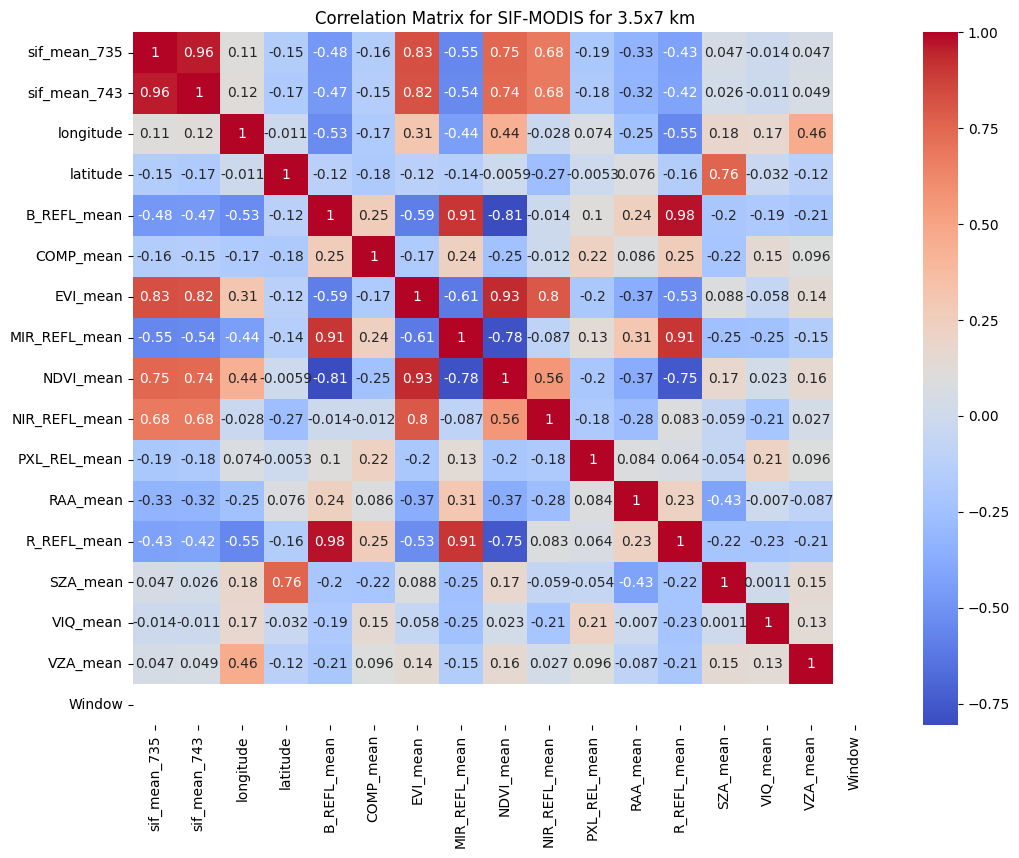

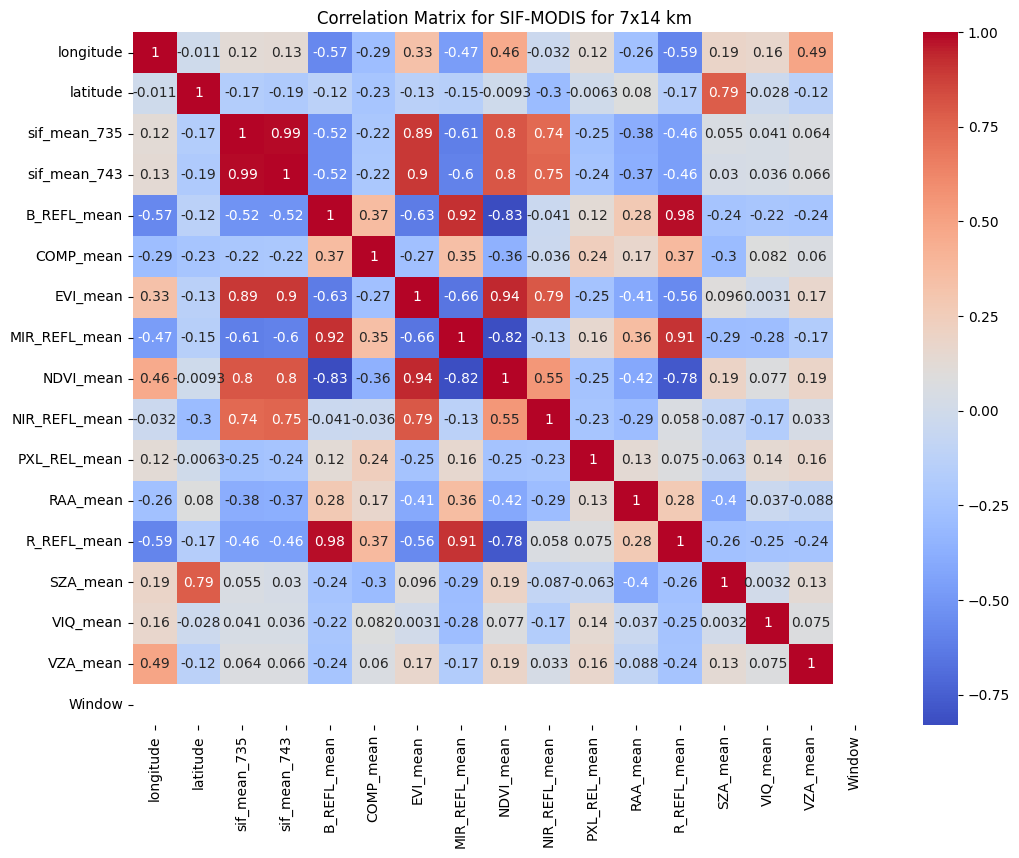

In [51]:
corr = three_data.corr()

plt.figure(figsize=(12, 9))
plt.title('Correlation Matrix for SIF-MODIS for 3.5x7 km')
sns.heatmap(corr, cmap='coolwarm', annot=True)

corr = seven_data.corr()

plt.figure(figsize=(12, 9))
plt.title('Correlation Matrix for SIF-MODIS for 7x14 km')
sns.heatmap(corr, cmap='coolwarm', annot=True)

# NDVI, EVI, NIR are highly correlated to SIF value. Alternatively, SZA Angle could also be included.

### Extract features and merge them

In [52]:
# merge sif_743 correlated features from lower resolution data along with target sif from higher resolution

merged = []
merged = {
    'longitude': seven_data['longitude'].copy(),
    'latitude': seven_data['latitude'].copy(),
    'sif_743': seven_data['sif_mean_743'].copy(),
    'NDVI': seven_data['NDVI_mean'].copy(),
    'EVI': seven_data['EVI_mean'].copy(),
    'NIR': seven_data['NIR_REFL_mean'].copy(),
    'target_sif': three_data['sif_mean_743'].copy()     # target sif_743 from higher (3.5x7km) resolution
}

merged_df = pd.DataFrame(merged)
merged_df.head(5)

,longitude,latitude,sif_743,NDVI,EVI,NIR,target_sif
0,-100.502966,49.762859,0.691817,3972.114286,2281.788462,2287.819048,0.883585
1,-100.457106,49.762859,0.548354,3349.292453,1896.943396,2156.669811,0.312943
2,-100.365385,49.762859,0.333582,3063.990476,1692.438095,2054.323810,0.336108
3,-100.319525,49.762859,0.323240,3195.285714,1743.542857,2036.304762,0.278045
4,-100.273665,49.762859,0.294832,3379.736364,1842.990909,2069.290909,0.370085


In [53]:
# shuffle to avoid overfitting

merged_df.sample(frac=1, ignore_index=True)

,longitude,latitude,sif_743,NDVI,EVI,NIR,target_sif
0,-97.338602,47.121824,0.144827,3189.008929,1775.428571,2082.089286,0.149081
1,-96.467256,47.750642,0.656195,4087.027778,2303.935780,2205.388889,0.768460
2,-99.585759,49.699977,0.669583,4612.068376,2497.461538,2185.239316,0.656492
3,-98.714413,45.612661,1.076615,4919.539130,2771.121739,2377.486726,0.886202
4,-95.274887,48.505223,0.881706,6050.218182,3187.763636,2258.605505,0.837652
...,...,...,...,...,...,...,...
16598,-100.136084,44.040617,1.301812,4303.848739,2624.470588,2557.201681,1.079745
16599,-94.953864,46.681652,1.187573,5849.557522,3525.389381,2728.642857,1.223620
16600,-96.237954,48.065051,0.714172,4115.482143,2244.875000,2099.035714,0.893850
16601,-96.925859,45.801307,0.445220,3779.139130,2117.530435,2192.321739,0.666977


In [54]:
input_scaled_df = merged_df[['sif_743', 'NDVI', 'EVI', 'NIR', 'target_sif']]
input_scaled_df.head(5)

,sif_743,NDVI,EVI,NIR,target_sif
0,0.691817,3972.114286,2281.788462,2287.819048,0.883585
1,0.548354,3349.292453,1896.943396,2156.669811,0.312943
2,0.333582,3063.990476,1692.438095,2054.323810,0.336108
3,0.323240,3195.285714,1743.542857,2036.304762,0.278045
4,0.294832,3379.736364,1842.990909,2069.290909,0.370085


### Create individual feature matrix with GeoSpatial referencing while normalizing them

In [55]:
def normalize_series(series):
    return (series - series.min()) / (series.max() - series.min())

def create_matrix(data, unique_lats, unique_lons):
    # Create a mapping from latitude/longitude to row/column indices
    lat_to_row = {lat: idx for idx, lat in enumerate(unique_lats)}
    lon_to_col = {lon: idx for idx, lon in enumerate(unique_lons)}

    # Initialize a matrix with NaNs (or zeros) with the appropriate shape
    matrix = np.full((len(unique_lats), len(unique_lons)), np.nan)

    # Populate the matrix with values
    for _, row in data.iterrows():
        lat, lon, value = row['latitude'], row['longitude'], row['value']
        matrix[lat_to_row[lat], lon_to_col[lon]] = value

    return matrix

# Create DataFrames with normalized values
sif_743_data = pd.DataFrame({
    'latitude': seven_data['latitude'],
    'longitude': seven_data['longitude'],
    'value': normalize_series(input_scaled_df['sif_743'])
})
ndvi_data = pd.DataFrame({
    'latitude': seven_data['latitude'],
    'longitude': seven_data['longitude'],
    'value': normalize_series(input_scaled_df['NDVI'])
})
evi_data = pd.DataFrame({
    'latitude': seven_data['latitude'],
    'longitude': seven_data['longitude'],
    'value': normalize_series(input_scaled_df['EVI'])
})
nir_data = pd.DataFrame({
    'latitude': seven_data['latitude'],
    'longitude': seven_data['longitude'],
    'value': normalize_series(input_scaled_df['NIR'])
})
target_sif_data = pd.DataFrame({
    'latitude': seven_data['latitude'],
    'longitude': seven_data['longitude'],
    'value': input_scaled_df['target_sif']
})

unique_lats = sorted(seven_data['latitude'].unique())
unique_lons = sorted(seven_data['longitude'].unique())

# Create matrices with normalized values
sif_743_matrix = create_matrix(sif_743_data, unique_lats, unique_lons)
ndvi_matrix = create_matrix(ndvi_data, unique_lats, unique_lons)
evi_matrix = create_matrix(evi_data, unique_lats, unique_lons)
nir_matrix = create_matrix(nir_data, unique_lats, unique_lons)
target_sif_matrix = create_matrix(target_sif_data, unique_lats, unique_lons)

# Optionally, convert NaNs to zeros if needed
sif_743_matrix = np.nan_to_num(sif_743_matrix)
ndvi_matrix = np.nan_to_num(ndvi_matrix)
evi_matrix = np.nan_to_num(evi_matrix)
nir_matrix = np.nan_to_num(nir_matrix)
target_sif_matrix = np.nan_to_num(target_sif_matrix)

print("SIF 743 Matrix:")
print(sif_743_matrix)
print("NDVI Matrix:")
print(ndvi_matrix)
print("EVI Matrix:")
print(evi_matrix)
print("NIR Matrix:")
print(nir_matrix)
print("Target SIF Matrix:")
print(target_sif_matrix)


SIF 743 Matrix:
[[0.77174571 0.73166241 0.73486942 ... 0.30061172 0.31825367 0.28179264]
 [0.7680751  0.74960553 0.77476419 ... 0.30750336 0.29866692 0.28317474]
 [0.78392066 0.79328355 0.81922873 ... 0.34181946 0.30143934 0.28678686]
 ...
 [0.30993304 0.33602083 0.34058674 ... 0.16130489 0.15108828 0.13603601]
 [0.31519604 0.33246334 0.35188911 ... 0.12950258 0.         0.15207784]
 [0.32836586 0.32434526 0.34369223 ... 0.13979654 0.14309927 0.2131619 ]]
NDVI Matrix:
[[0.87232756 0.87160703 0.85727037 ... 0.60998099 0.63866394 0.60146911]
 [0.78490527 0.7629193  0.77964582 ... 0.58193902 0.59518681 0.55173348]
 [0.75529191 0.75342411 0.78821885 ... 0.58584263 0.55783132 0.52911476]
 ...
 [0.52034655 0.49895634 0.50544188 ... 0.80611423 0.81590849 0.70942646]
 [0.50091759 0.50217097 0.53817328 ... 0.72090528 0.         0.57434246]
 [0.52559254 0.52316038 0.58623941 ... 0.69223672 0.56394968 0.62372469]]
EVI Matrix:
[[0.76857038 0.76080192 0.74442847 ... 0.4187096  0.49840976 0.48042816

In [56]:
ndvi_matrix.shape

(97, 173)

### Generate sub-matrices samples for efficient training

In [57]:
# We have around 16603 instances f data when arranged geo-spatially, they account to a matrix size of (97, 173)
# This singular matrix (,4) is not sufficient to train the model. Hence we need to generate snippets of the original matrix
# by cropping them in equivalent small matrices to populate the training set.

# This size and number of sampels totally depends on the original geo-spatiated matrix.

[(25, 23), (56, 1), (1, 95), (39, 88), (22, 17), (42, 66), (40, 41), (9, 17), (5, 28), (3, 95), (29, 59), (50, 91), (15, 69), (47, 55), (34, 67), (10, 45), (16, 104), (54, 97), (43, 5), (48, 120), (20, 49), (21, 48), (35, 10), (50, 102), (36, 2), (56, 14), (53, 82), (57, 98), (20, 79), (10, 56), (15, 119), (16, 127), (16, 81), (7, 78), (55, 8), (48, 24), (2, 36), (18, 87), (20, 17), (1, 46), (3, 65), (12, 13), (51, 114), (0, 112), (12, 86), (26, 112), (21, 43), (29, 111), (13, 5), (18, 53), (7, 126), (13, 23), (25, 22), (54, 122), (25, 86), (45, 64), (48, 26), (37, 124), (2, 102), (40, 31), (11, 114), (31, 92), (4, 75), (49, 43), (9, 16), (43, 66), (44, 10), (32, 75), (53, 52), (46, 22), (39, 80), (48, 28), (56, 130), (25, 106), (29, 33), (55, 24), (43, 4), (26, 52), (24, 119), (8, 13), (42, 15), (43, 77), (16, 115), (15, 61), (39, 55), (41, 89), (34, 50), (45, 50), (18, 130), (42, 97), (33, 94), (25, 99), (20, 87), (32, 52), (11, 118), (38, 102), (18, 41), (8, 6), (23, 37), (49, 56), 

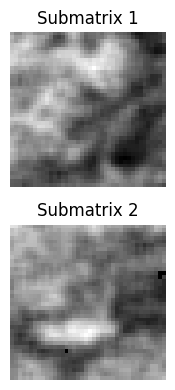

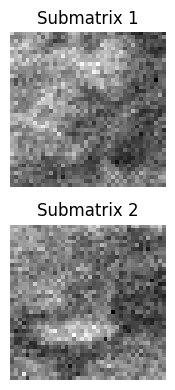

In [58]:
submatrix_size = (40, 40)     # Size can vary based on extent of region under study
num_submatrices = 200  # Number of submatrices to extract, number of samples may vary based on model performance

def get_random_top_left_corners(matrix_shape, submatrix_size, num_submatrices):
    max_row = matrix_shape[0] - submatrix_size[0]
    max_col = matrix_shape[1] - submatrix_size[1]

    top_left_corners = set()
    while len(top_left_corners) < num_submatrices:
        row = np.random.randint(0, max_row + 1)
        col = np.random.randint(0, max_col + 1)
        top_left_corners.add((row, col))

    return list(top_left_corners)

def plot_submatrices(submatrices, num_to_plot=5):
    fig, axes = plt.subplots(num_to_plot, 1, figsize=(8, num_to_plot * 2))
    for i in range(num_to_plot):
        axes[i].imshow(submatrices[i], cmap='gray')
        axes[i].set_title(f'Submatrix {i+1}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Get random top-left corners for submatrices
top_left_corners = get_random_top_left_corners(sif_743_matrix.shape, submatrix_size, num_submatrices)
print(top_left_corners)

# Lists to hold the extracted submatrices
sif_submatrices = []
ndvi_submatrices = []
evi_submatrices = []
nir_submatrices = []
target_sif_submatrices = []

# Extract submatrices
for (row, col) in top_left_corners:
    # Extract submatrices for each matrix type
    sif_743_submatrix = sif_743_matrix[row:row + submatrix_size[0], col:col + submatrix_size[1]]
    ndvi_submatrix = ndvi_matrix[row:row + submatrix_size[0], col:col + submatrix_size[1]]
    evi_submatrix = evi_matrix[row:row + submatrix_size[0], col:col + submatrix_size[1]]
    nir_submatrix = nir_matrix[row:row + submatrix_size[0], col:col + submatrix_size[1]]
    target_sif_submatrix = target_sif_matrix[row:row + submatrix_size[0], col:col + submatrix_size[1]]

    # Append submatrices to their respective lists
    sif_submatrices.append(sif_743_submatrix)
    ndvi_submatrices.append(ndvi_submatrix)
    evi_submatrices.append(evi_submatrix)
    nir_submatrices.append(nir_submatrix)
    target_sif_submatrices.append(target_sif_submatrix)

# Convert lists to numpy arrays if needed
sif_submatrices = np.array(sif_submatrices)
ndvi_submatrices = np.array(ndvi_submatrices)
evi_submatrices = np.array(evi_submatrices)
nir_submatrices = np.array(nir_submatrices)
target_sif_submatrices = np.array(target_sif_submatrices)

# Plot some of the extracted submatrices
plot_submatrices(sif_submatrices, num_to_plot=2)
plot_submatrices(target_sif_submatrices, num_to_plot=2)

In [59]:
target_sif_submatrices[0]

array([[ 1.29063049,  0.71036412,  0.77034522, ...,  0.37756945,
         0.21472293, -0.06606423],
       [ 0.62526465,  0.58973101,  0.61210681, ..., -0.02326698,
         0.34039014,  0.68794457],
       [ 0.73867288,  1.19220658,  0.64542709, ...,  0.20179919,
         0.24534791,  0.07733406],
       ...,
       [ 0.4067043 ,  0.22593603,  0.5908354 , ...,  0.432535  ,
         0.94652685,  0.99547926],
       [ 0.36893214,  0.74421053,  0.3953483 , ...,  0.63217152,
         0.72328609,  0.82854755],
       [ 0.46581852,  0.37410961,  0.38458995, ...,  0.61322162,
         0.46807896,  0.35986131]])

### Create a Spatial Dataset Loader by stacking all submatrices as single input

#### Here each sub-matrice from SIF_743, NDVI, EVI, NIR will act as single input against TARGET_SIF_743 

In [60]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

submatrices_combined = np.stack([sif_submatrices, ndvi_submatrices, evi_submatrices, nir_submatrices, target_sif_submatrices], axis=1)

# Define a custom Dataset class
class SpatialDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Extract features and targets. Confirm if itended features are the first four columns and target sif as last
features = submatrices_combined[:, :4, :, :]  # Shape: (no_of_samples, 4, 40, 40)
targets = submatrices_combined[:, 4:, :, :]   # Shape: (no_of_samples, 1, 40, 40)

# Create the dataset
full_dataset = SpatialDataset(features, targets)

# Split the dataset into train and test sets

# Instead of same temporal dataset, alternative temporal set can be used for testing purpose to validate efficiency of 
# model and ensure if it works for any non-trained instances.

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)


### Train and Test the CNN Regression Model

In [61]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the CNNRegressor model
class CNNRegressor(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=4, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Calculate the size after the last pooling layer
        self._to_linear = 128 * 5 * 5  # Adjust based on the actual size

        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 40 * 40)  # Output size is 40x40

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.view(-1, 1, 40, 40)  # Reshape to match the target shape
        return x

# Initialize the model, loss function, and optimizer
model = CNNRegressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 400
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_dataloader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    # Iterate over the test dataloader
    test_predictions = []
    test_targets = []
    for inputs, targets in test_dataloader:
        outputs = model(inputs)
        test_predictions.append(outputs)
        test_targets.append(targets)

    # Concatenate results
    test_predictions = torch.cat(test_predictions, dim=0)
    test_targets = torch.cat(test_targets, dim=0)

    # Print predictions for the first 2 test samples
    for i in range(2):
        print(f"Test Sample {i + 1}:")
        print(f"Predicted:\n{test_predictions[i].numpy()}")
        print(f"Actual:\n{test_targets[i].numpy()}")


Epoch 1/400, Loss: 0.3585
Epoch 2/400, Loss: 0.1945
Epoch 3/400, Loss: 0.1556
Epoch 4/400, Loss: 0.1449
Epoch 5/400, Loss: 0.1377
Epoch 6/400, Loss: 0.1207
Epoch 7/400, Loss: 0.1129
Epoch 8/400, Loss: 0.1073
Epoch 9/400, Loss: 0.1018
Epoch 10/400, Loss: 0.0975
Epoch 11/400, Loss: 0.0952
Epoch 12/400, Loss: 0.0943
Epoch 13/400, Loss: 0.0913
Epoch 14/400, Loss: 0.0897
Epoch 15/400, Loss: 0.0885
Epoch 16/400, Loss: 0.0880
Epoch 17/400, Loss: 0.0873
Epoch 18/400, Loss: 0.0863
Epoch 19/400, Loss: 0.0860
Epoch 20/400, Loss: 0.0849
Epoch 21/400, Loss: 0.0838
Epoch 22/400, Loss: 0.0815
Epoch 23/400, Loss: 0.0794
Epoch 24/400, Loss: 0.0784
Epoch 25/400, Loss: 0.0779
Epoch 26/400, Loss: 0.0780
Epoch 27/400, Loss: 0.0755
Epoch 28/400, Loss: 0.0727
Epoch 29/400, Loss: 0.0711
Epoch 30/400, Loss: 0.0686
Epoch 31/400, Loss: 0.0669
Epoch 32/400, Loss: 0.0652
Epoch 33/400, Loss: 0.0651
Epoch 34/400, Loss: 0.0683
Epoch 35/400, Loss: 0.0660
Epoch 36/400, Loss: 0.0621
Epoch 37/400, Loss: 0.0610
Epoch 38/4

Epoch 298/400, Loss: 0.0009
Epoch 299/400, Loss: 0.0009
Epoch 300/400, Loss: 0.0009
Epoch 301/400, Loss: 0.0008
Epoch 302/400, Loss: 0.0009
Epoch 303/400, Loss: 0.0009
Epoch 304/400, Loss: 0.0008
Epoch 305/400, Loss: 0.0008
Epoch 306/400, Loss: 0.0008
Epoch 307/400, Loss: 0.0008
Epoch 308/400, Loss: 0.0008
Epoch 309/400, Loss: 0.0008
Epoch 310/400, Loss: 0.0008
Epoch 311/400, Loss: 0.0007
Epoch 312/400, Loss: 0.0007
Epoch 313/400, Loss: 0.0007
Epoch 314/400, Loss: 0.0008
Epoch 315/400, Loss: 0.0009
Epoch 316/400, Loss: 0.0009
Epoch 317/400, Loss: 0.0009
Epoch 318/400, Loss: 0.0009
Epoch 319/400, Loss: 0.0011
Epoch 320/400, Loss: 0.0011
Epoch 321/400, Loss: 0.0013
Epoch 322/400, Loss: 0.0016
Epoch 323/400, Loss: 0.0022
Epoch 324/400, Loss: 0.0045
Epoch 325/400, Loss: 0.0054
Epoch 326/400, Loss: 0.0056
Epoch 327/400, Loss: 0.0053
Epoch 328/400, Loss: 0.0048
Epoch 329/400, Loss: 0.0031
Epoch 330/400, Loss: 0.0027
Epoch 331/400, Loss: 0.0019
Epoch 332/400, Loss: 0.0016
Epoch 333/400, Loss:

### Plot few sample results

In [62]:
import matplotlib.pyplot as plt

def visualize_input_target_prediction(inputs, targets, predictions, index):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot input matrix
    axes[0].imshow(inputs[index, 0, :, :], cmap='gray')
    axes[0].set_title('Input Matrix')
    axes[0].axis('off')

    # Plot target matrix
    axes[1].imshow(targets[index, 0, :, :], cmap='gray')
    axes[1].set_title('Actual Target')
    axes[1].axis('off')

    # Plot predicted matrix
    axes[2].imshow(predictions[index, 0, :, :], cmap='gray')
    axes[2].set_title('Predicted Output')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


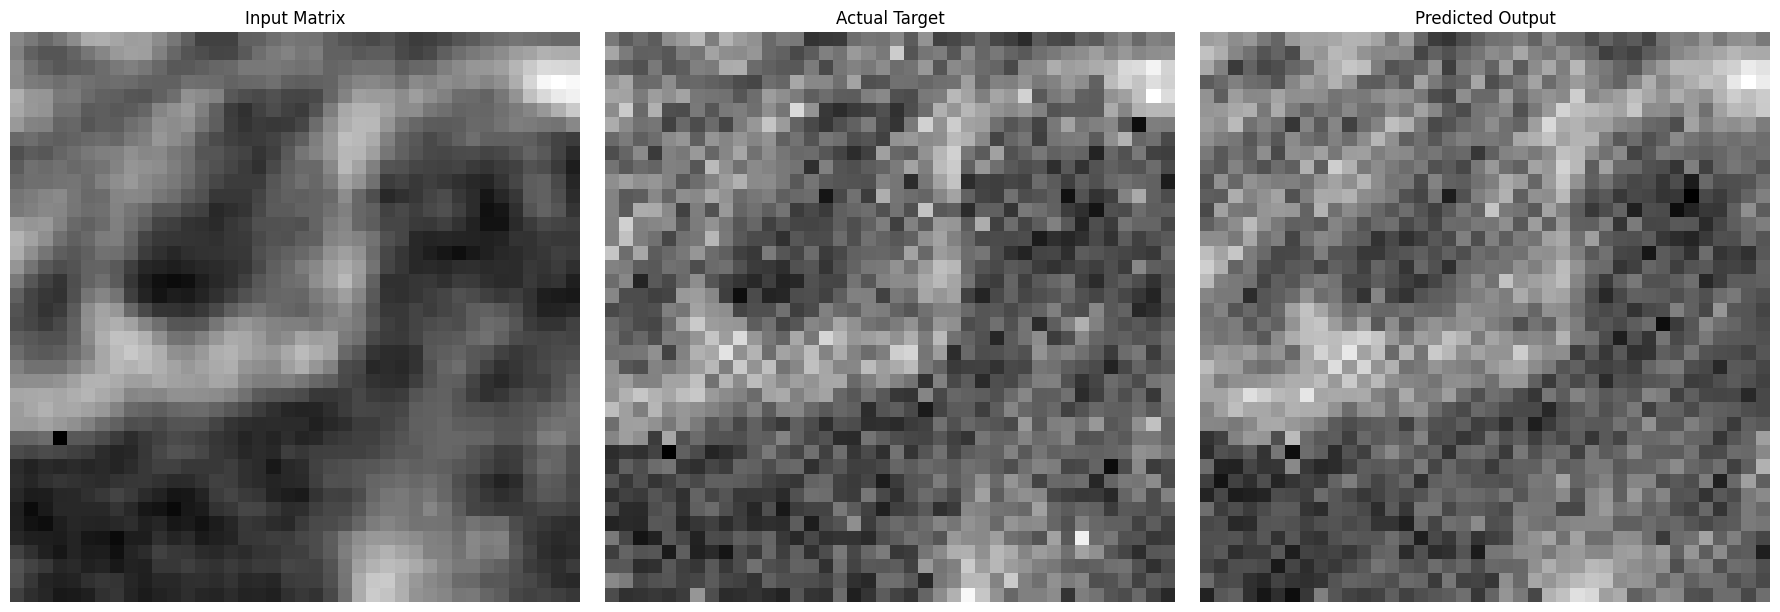

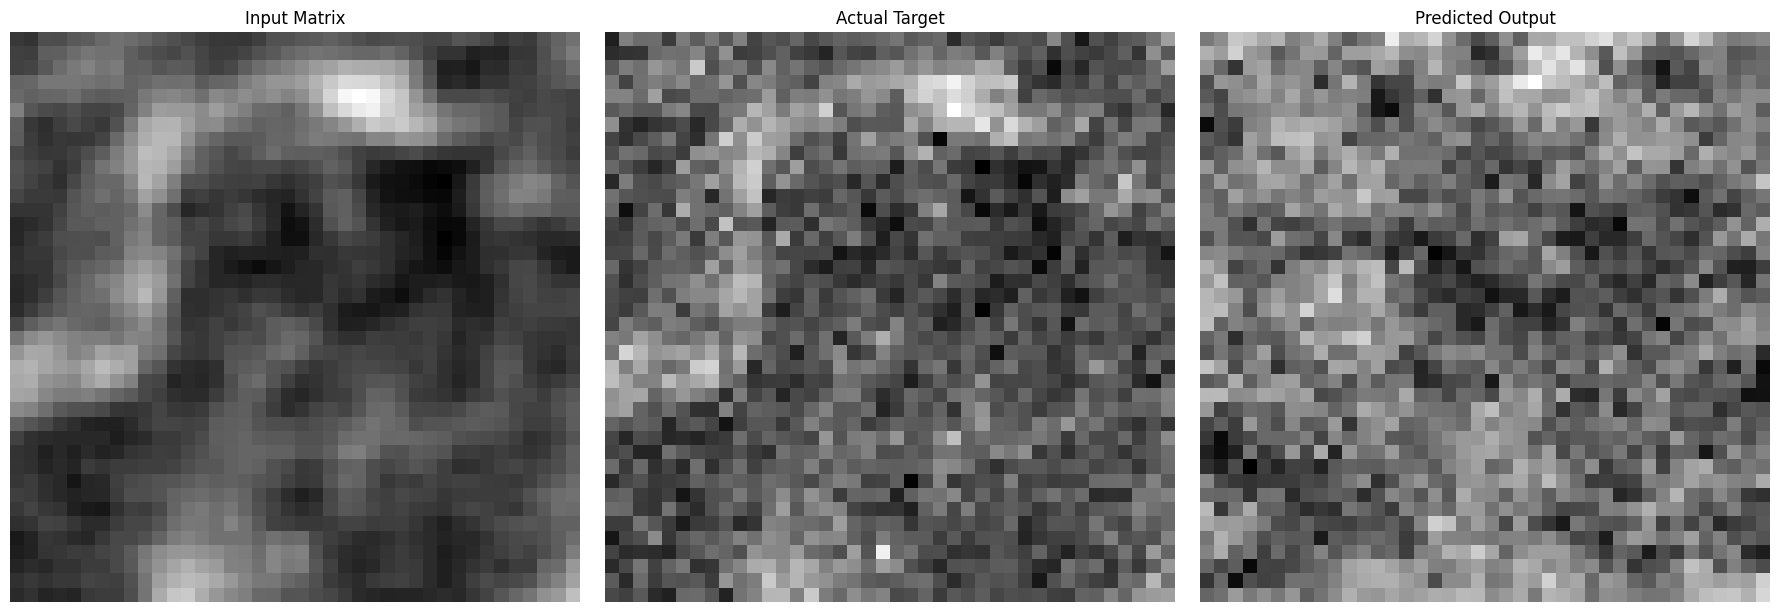

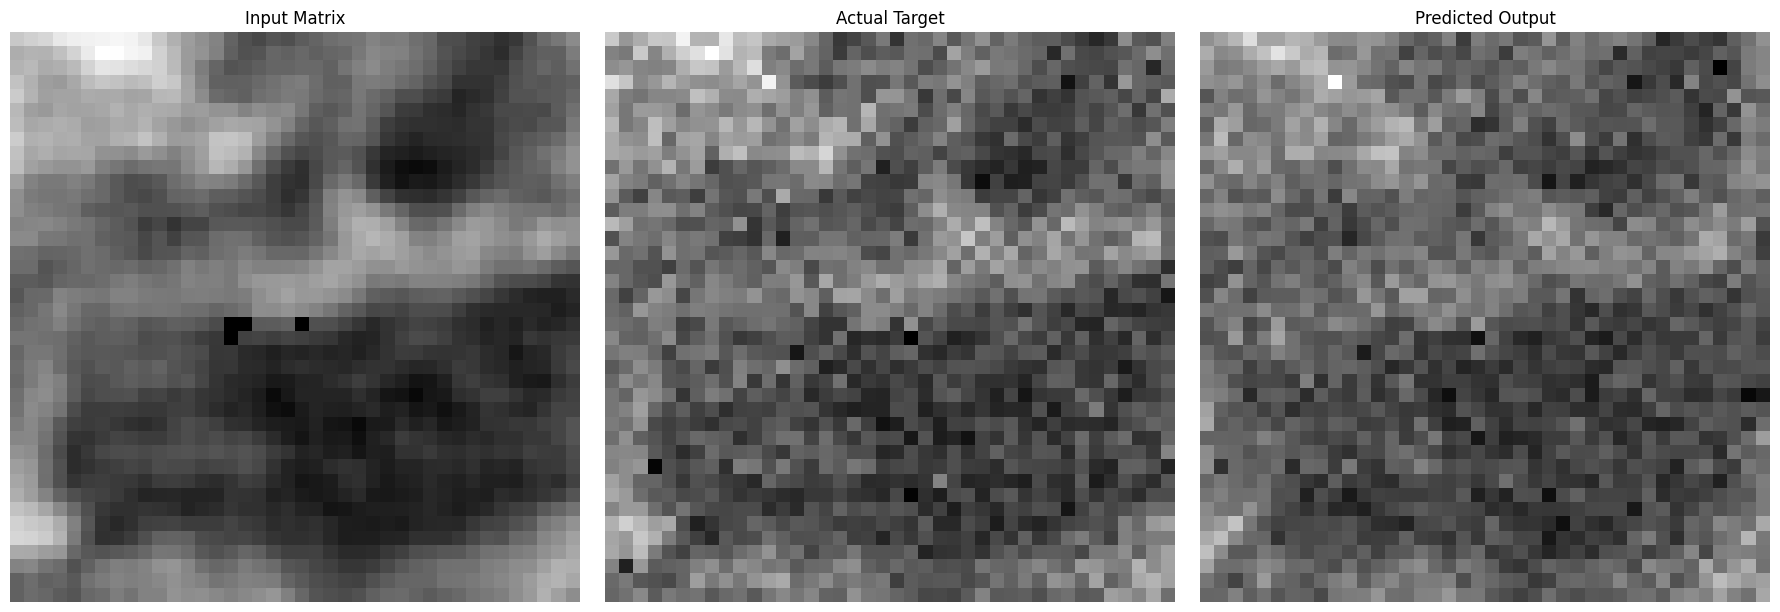

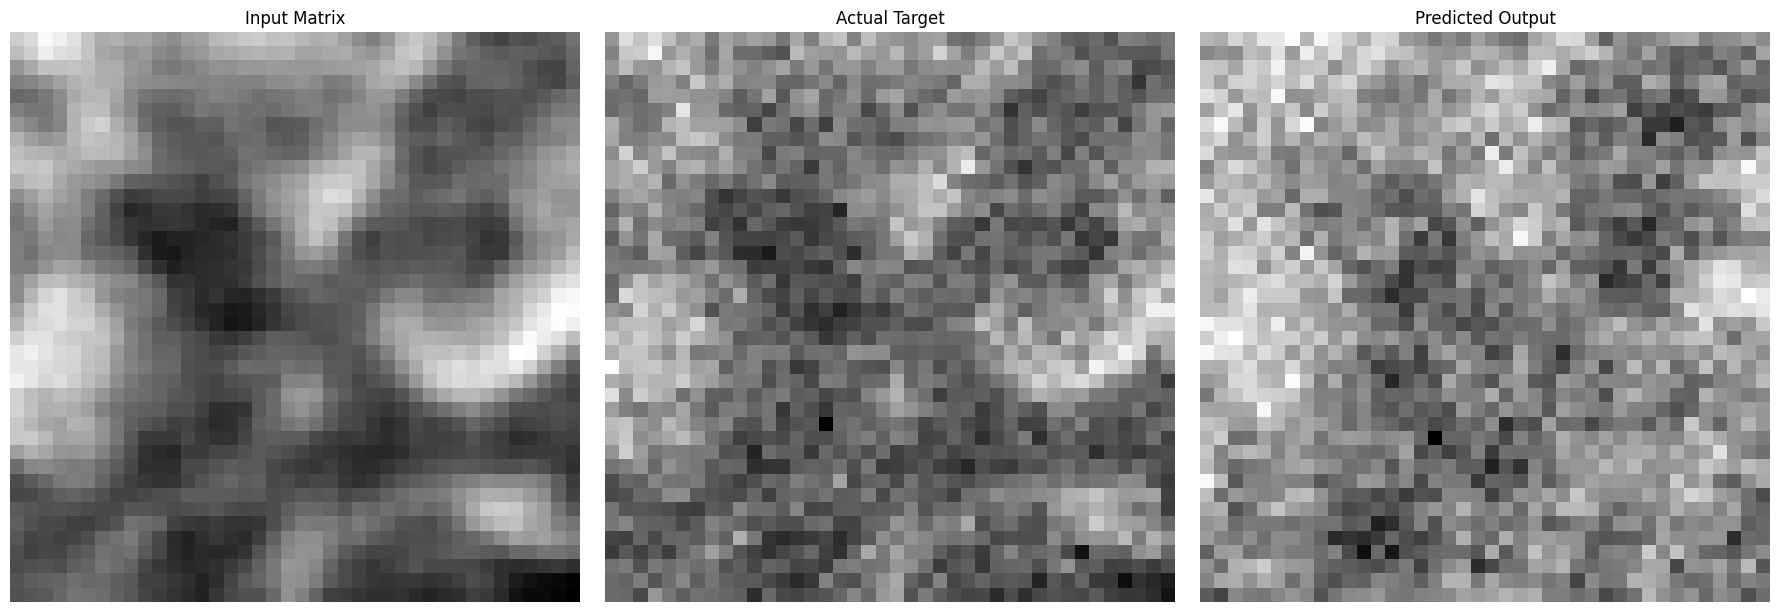

In [70]:
test_inputs_np = torch.cat([inputs for inputs, _ in test_dataloader], dim=0).numpy()

visualize_input_target_prediction(test_inputs_np, test_targets.numpy(), test_predictions.numpy(), index=7)
visualize_input_target_prediction(test_inputs_np, test_targets.numpy(), test_predictions.numpy(), index=10)
visualize_input_target_prediction(test_inputs_np, test_targets.numpy(), test_predictions.numpy(), index=15)
visualize_input_target_prediction(test_inputs_np, test_targets.numpy(), test_predictions.numpy(), index=20)